![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


   # **Cortex Game: Round1--Amount**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [3]:
my_folder = "/content/drive/MyDrive/TrabajosTec/Ago-Dic22/Reto/retoSas"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TrabajosTec/Ago-Dic22/Reto/retoSas


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [4]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [5]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [6]:
!pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 4.6 MB/s 
  Created wheel for saspy: filename=saspy-4.4.1-py3-none-any.whl size=9937304 sha256=92b582d3b295881e99c91f86822a7a2ca4c538063615abbf612aef6c72bfe717
  Stored in directory: /root/.cache/pip/wheels/0a/f6/ab/f7173c8a824856c66f6fd50194bb8fd3ef93fb4f1824be8d0c
Successfully built saspy


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [7]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
#'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Writing sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [9]:
#%%writefile .authinfo
oda user a00827757@tec.mx password SasSaco2022.

Writing .authinfo


Copy this file to home

In [10]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [418]:
import saspy
sas_session = saspy.SASsession(cfgfile="/content/drive/MyDrive/TrabajosTec/Ago-Dic22/Reto/retoSas/sascfg_personal.py")
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 3628



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/TrabajosTec/Ago-Dic22/Reto/retoSas/sascfg_personal.py
WORK Path             = /saswork/SAS_work24F70001CAFF_odaws01-usw2-2.oda.sas.com/SAS_work52280001CAFF_odaws01-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 117503


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [419]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Friday, December  2, 2022 11:34:00 AM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Friday, December  2, 2022 11:34:00 AM

33         


For local Jupyter

In [ ]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

UsageError: Cell magic `%%SAS` not found.


## Transform cloud SAS dataset to Python dataframe (pandas)


> **For reference**:

> 1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [420]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd1',
libref='cortex'
)

In [329]:
import matplotlib.pyplot as plt
import seaborn as sns

## Merge the Data

In [431]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge.sample(5)

#data_merge.head()


,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
96252,2096253.0,GILBERT,ELWOOD,0.0,60.0,41400.0,University / College,Downtown,7.0,1.0,...,4.0,1.0,4.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0
488181,2488182.0,BLUMENTHAL,WILLIE,1.0,44.0,103800.0,University / College,Downtown,4.0,1.0,...,1.0,4.0,4.0,450.0,25.0,200.0,0.0,0.0,0.0,0.0
777362,2777363.0,MCCAREY,FRANCES,1.0,29.0,1200.0,University / College,Rural,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
416935,2416936.0,JAMES,PETER,0.0,49.0,105200.0,High School,City,6.0,0.0,...,3.0,1.0,3.0,25.0,25.0,25.0,0.0,0.0,0.0,0.0
543031,2543032.0,HENDERSON,ESTHER,1.0,83.0,34200.0,University / College,Rural,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


## Exploración de datos

In [456]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 23 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ID            1000000 non-null  float64
 1   LastName      999977 non-null   object 
 2   FirstName     999996 non-null   object 
 3   Woman         1000000 non-null  float64
 4   Age           1000000 non-null  float64
 5   Salary        1000000 non-null  float64
 6   Education     1000000 non-null  int64  
 7   City          1000000 non-null  int64  
 8   SeniorList    1000000 non-null  float64
 9   NbActivities  1000000 non-null  float64
 10  Referrals     1000000 non-null  float64
 11  Recency       1000000 non-null  float64
 12  Frequency     1000000 non-null  float64
 13  Seniority     1000000 non-null  float64
 14  TotalGift     1000000 non-null  float64
 15  MinGift       1000000 non-null  float64
 16  MaxGift       1000000 non-null  float64
 17  GaveLastYear  1000000 non-nu

In [457]:
data_merge.describe()

,ID,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,...,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear,ConvRate,normSalary
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500000e+06,0.516936,46.366170,65531.654000,1.381676,2.293402,4.582967,0.561413,0.560556,7.658993,...,8.141468,35.13145,14.506170,28.890395,0.122101,7.673015,0.122232,7.741080,0.122232,10.565331
std,2.886753e+05,0.499713,18.945324,61051.122343,0.543286,1.089046,3.325844,0.996803,1.054027,3.510926,...,3.011432,182.94542,89.486978,169.393921,0.327403,82.224854,0.327554,83.110552,0.000935,1.213257
min,2.000001e+06,0.000000,16.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120934,0.000000
25%,2.250001e+06,0.000000,30.000000,20700.000000,1.000000,1.000000,2.000000,0.000000,0.000000,4.000000,...,6.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120934,9.937937
50%,2.500000e+06,1.000000,46.000000,44000.000000,1.000000,2.000000,4.000000,0.000000,0.000000,10.000000,...,10.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.122919,10.691968
75%,2.750000e+06,1.000000,61.000000,91200.000000,2.000000,3.000000,7.000000,1.000000,1.000000,10.000000,...,10.000000,20.00000,15.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.122919,11.420821
max,3.000000e+06,1.000000,90.000000,250000.000000,3.000000,4.000000,10.000000,10.000000,16.000000,10.000000,...,10.000000,15150.00000,10000.000000,10000.000000,1.000000,10000.000000,1.000000,10000.000000,0.122919,12.429220


In [458]:
#separamos en variables numéricas y categóricas
data_merge_num = data_merge[['Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift', 'MinGift', 'MaxGift', 'AmtLastYear', 'AmtThisYear']]
data_merge_cat = data_merge[['City', 'Education', 'Woman', 'GaveLastYear', 'GaveThisYear']]
                             

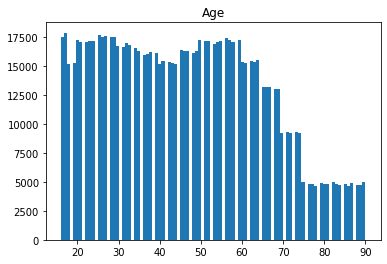

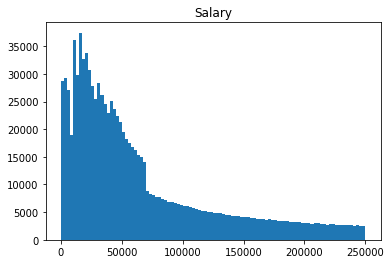

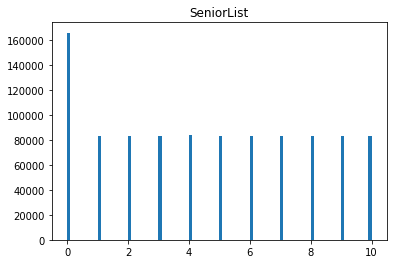

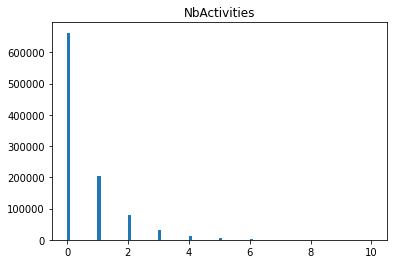

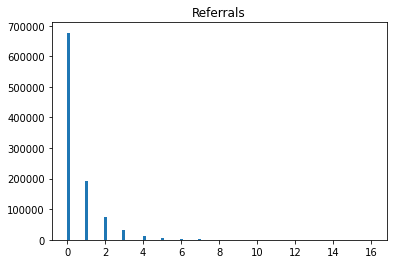

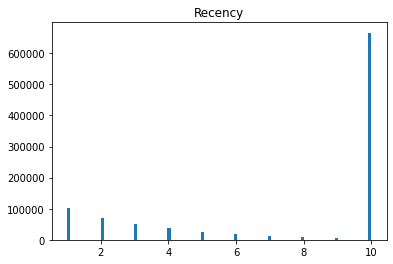

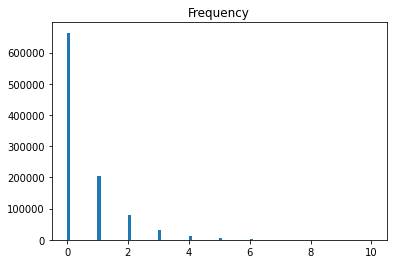

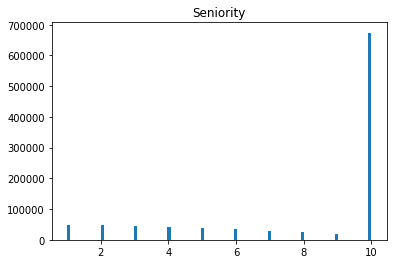

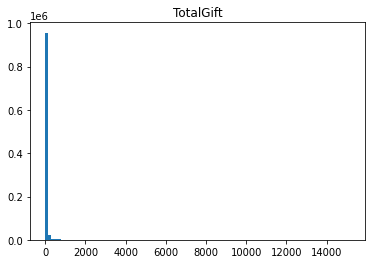

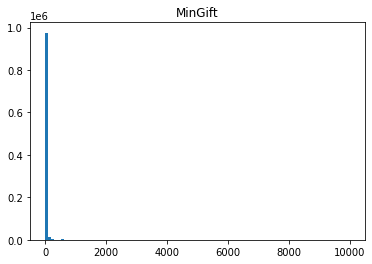

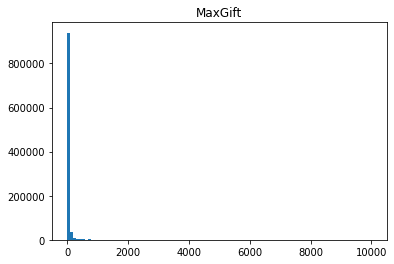

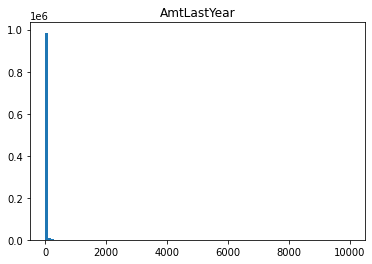

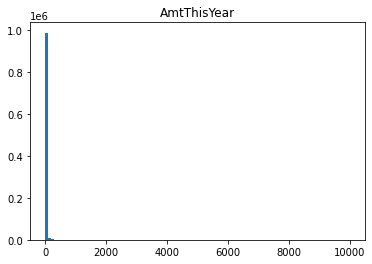

In [459]:
#vemos la dsitribución de las variables numéricas
for i in data_merge_num.columns:
  plt.hist(data_merge_num[i], bins = 100)
  plt.title(i)
  plt.show()

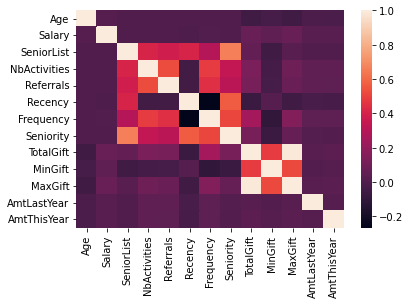

In [330]:
#mapa de correlación de las variables
sns.heatmap(data_merge_num.corr())

In [434]:
#vemos el promedio que tienen las variables numércias respecto 
pd.pivot_table(data_merge, index = 'GaveThisYear', values = ['Age', 'Salary', 'SeniorList', 'NbActivities', 'Referrals', 'Recency', 'Seniority', 'TotalGift', 'MinGift', 'MaxGift', 'AmtLastYear', 'AmtThisYear'])

,Age,AmtLastYear,AmtThisYear,MaxGift,MinGift,NbActivities,Recency,Referrals,Salary,SeniorList,Seniority,TotalGift
GaveThisYear,,,,,,,,,,,,
0.0,46.363490,6.666853,0.000000,81.090572,43.569856,0.498241,3.126360,0.497747,65499.395057,4.584599,4.432154,97.270722
1.0,46.385415,14.898431,63.331043,107.724270,41.134364,1.015062,2.645895,1.011601,65763.310753,4.571250,4.664805,137.067767


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


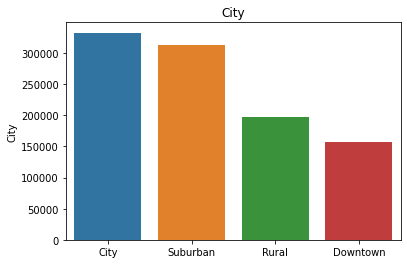

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


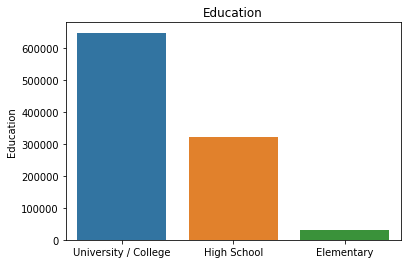

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


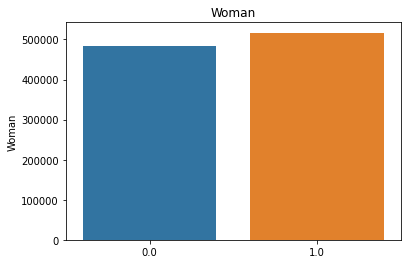

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


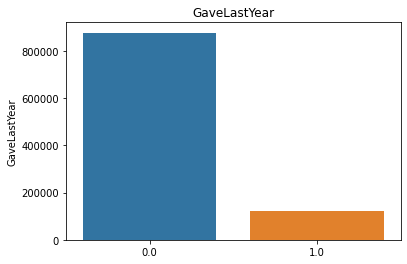

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


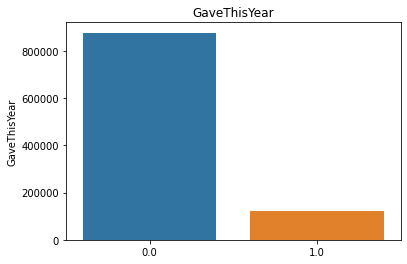

In [435]:
for i in data_merge_cat.columns:
  sns.barplot(data_merge_cat[i].value_counts().index,data_merge_cat[i].value_counts()).set_title(i)
  plt.show()

In [436]:
print(pd.pivot_table(data_merge, index = 'GaveThisYear', columns = 'Woman', values = 'ID', aggfunc = 'count'))
print(pd.pivot_table(data_merge, index = 'GaveThisYear', columns = 'City', values = 'ID', aggfunc = 'count'))
print(pd.pivot_table(data_merge, index = 'GaveThisYear', columns = 'Education', values = 'ID', aggfunc = 'count'))
print(pd.pivot_table(data_merge, index = 'GaveThisYear', columns = 'GaveLastYear', values = 'ID', aggfunc = 'count'))

Woman            0.0     1.0
GaveThisYear                
0.0           423905  453863
1.0            59159   63073
City            City  Downtown   Rural  Suburban
GaveThisYear                                    
0.0           289092    133988  179308    275380
1.0            43565     22706   18670     37291
Education     Elementary  High School  University / College
GaveThisYear                                               
0.0                25991       283513                568264
1.0                 3589        39003                 79640
GaveLastYear     0.0    1.0
GaveThisYear               
0.0           782524  95244
1.0            95375  26857


## Treat Missing Values

> Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

> A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.


In [437]:
# In this case, we are replacing MinGift by 0.
# You can do the same for what you think is reasonable for dealing with the other variables.

data_merge[['MinGift']] = data_merge[['MinGift']].fillna(value=0)  

data_merge.sample(3)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
341547,2341548.0,LARSEN,KENNETH,0.0,30.0,115400.0,University / College,Suburban,10.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,1.0,20.0
941104,2941105.0,ALVAREZ,RANDALL,0.0,23.0,18000.0,High School,Suburban,8.0,0.0,...,1.0,2.0,8.0,45.0,20.0,25.0,0.0,0.0,0.0,0.0
597137,2597138.0,GANGI,SARA,1.0,58.0,193200.0,University / College,Downtown,6.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,1.0,20.0,0.0,0.0


Para el MaxGift primero veré cuáles son los valores únicos en la columna MinGift cuando MaxGift es nulo. Esto me dará una idea de qué tipo de valores debo utilizar para sustituirlo.

In [438]:
data_merge[data_merge['MaxGift'].isna()]['MinGift'].unique()

array([0.])

Como solo hay 0, puedo sustituir MaxGift por cero también. 

In [439]:
data_merge[['MaxGift']] = data_merge[['MaxGift']].fillna(value=0)

Ya que el dataset tiene historial de 10 años, a las personas que no han hecho ninguna donación les pondremos un recency de 10 en vez de nan. De igual manera los valores nulos de frequency pasarán a tener un valor de 0 debido a que asumiremos no han hecho donaciones. Realizaremos lo mismo con TotalGift.

In [440]:
data_merge[['Recency']] = data_merge[['Recency']].fillna(value=10)
data_merge[['Frequency']] = data_merge[['Frequency']].fillna(value=0)
data_merge[['TotalGift']] = data_merge[['TotalGift']].fillna(value=0)
data_merge[['Seniority']] = data_merge[['Seniority']].fillna(value=10)

In [441]:
data_merge['Frequency'].unique()

array([ 2.,  0.,  3.,  1.,  4.,  5.,  6.,  7.,  9.,  8., 10.])

## Data processing

Cambiaremos la variable categórica educación en una variable numérica, esto para ver si tiene alguna influencia en el modelo.

In [443]:
data_merge['Education'].replace(['University / College', 'High School', 'Elementary'], 
                                [1, 2, 3], inplace=True)
data_merge['City'].replace(['City', 'Rural', 'Suburban', 'Downtown'], 
                                [1, 2, 3, 4], inplace=True)
data_merge['City'].unique()

array([1, 2, 3, 4])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f914e9d8e20>]],
      dtype=object)

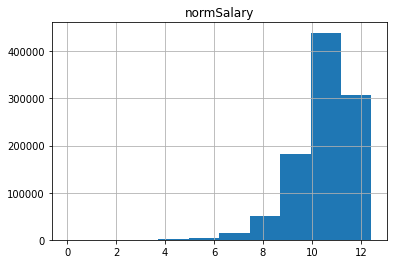

In [444]:
data_merge['normSalary'] = np.log(data_merge.Salary+1)
data_merge[['normSalary']].hist()

## Data Partition

In [464]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

#cambiamos el test_size para mejores resultados
from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_merge, test_size=0.6, random_state=12345) 

#train.head()
train.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear,ConvRate,normSalary
85405,2085406.0,GUTIERREZ,SARAH,1.0,68.0,38100.0,2,2,1.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120934,10.547996
686315,2686316.0,SLATER,JOHN,0.0,30.0,1300.0,1,4,0.0,0.0,...,10.0,0.0,0.0,0.0,1.0,10.0,0.0,0.0,0.122919,7.170888


## Prebuilt Models
***

### **Linear Regression Model**


> The [sk-learn library](https://scikit-learn.org/stable/index.html ) offers more advanced models.


In [465]:
from sklearn import linear_model

#comment: it's numpy array 
X_train = train[['Age','Salary','City','MinGift','MaxGift', 'SeniorList','Referrals','Education','Recency', 'Frequency', 'Seniority', 'TotalGift', 'GaveLastYear','AmtLastYear','Woman',  'NbActivities'  ]]
Y_train = train['AmtThisYear']
X_valid = validation[['Age','Salary', 'City','MinGift','MaxGift', 'SeniorList', 'Referrals','Education','Recency', 'Frequency', 'Seniority', 'TotalGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities']] 
Y_valid = validation['AmtThisYear']

regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)

In [466]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict)))

13.174437832781663
6880.401000484869
82.94818262315859


## **Regression Tree Model**

In [467]:
from sklearn.tree import DecisionTreeRegressor

X_train = train[['Age','Salary','City','MinGift','MaxGift', 'SeniorList','Referrals','Education','Recency', 'Frequency', 'Seniority', 'TotalGift', 'GaveLastYear','AmtLastYear','Woman',  'NbActivities' ]] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age','Salary','City','MinGift','MaxGift', 'SeniorList','Referrals','Education','Recency', 'Frequency', 'Seniority', 'TotalGift', 'GaveLastYear','AmtLastYear','Woman',  'NbActivities' ]] 
Y_valid = validation['AmtThisYear']

DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)

DT_predict = DT_model.predict(X_valid) #Predictions on Testing data


In [468]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

13.156260784872748
7008.287843129076
83.71551733776167


### **Other models may also be helpful for this game**

Reference: https://scikit-learn.org/stable/supervised_learning.html

***


## Scoring New Data

### Prepare data for scoring

In [21]:
data3 = sas_session.sasdata2dataframe(
table='score_rd1',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)

 ### Score new data based on your champion model
 
> Pick your champion model from previous steps and use it to predict next year donations. 
 
> In this case, the linear regression model performed better than the regression tree based on the MSE criterion.

In [22]:
scoring_data = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data[['MinGift']] = scoring_data[['MinGift']].fillna(value=0) 

scoring_data.head()

,ID,GaveLastYear,AmtLastYear,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift
0,2000001.0,0.0,0.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0
1,2000002.0,0.0,0.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN
2,2000003.0,0.0,0.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
3,2000004.0,0.0,0.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4,2000005.0,0.0,0.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN


In [460]:
# In this case, based on MSE (Mean Squared Error) criterion,
# the linear regression model performed better than the regression tree.

X = scoring_data[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities']] 
regr_predict_end=regr.predict(X)

scoring_data['Prediction'] = regr_predict_end
scoring_data.sort_values(by=['Prediction'], inplace=True,ascending=False)
scoring_data.head()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- City
- Education
- Frequency
- GaveLastYear
- MaxGift
- ...

  warnings.warn(message, FutureWarning)


ValueError: ignored

## Exporting Results to a CSV File

In [24]:
Result= scoring_data[['ID','Prediction']]
#Result.to_csv('Round1_Output.csv', index=False)

In [25]:
# Define your cutoff and choose a number of rows to submit to the leaderboard

NB = 10000
submission = Result.head(NB)
submission.to_csv('Round1 Output.csv', index=False)

In [ ]:
# Reminder: Please note that you need only one column (the list of donors' IDs) to submit to the leaderboard.


In [ ]:
!head Round1\ Output.csv

ID,Prediction
2420891.0,203.53100264852912
2631674.0,157.07423550309795
2334250.0,154.56589904654052
2954314.0,149.93662884564222
2416111.0,149.59033329198328
2100799.0,145.1098616263633
2094131.0,144.0934294771176
2132411.0,143.607439950489
2265980.0,143.60338124946452
